#Grasp and Lift Plots

Some scripts to load data and draw some plots for the EEG grasp and lift [Kaggle Competition](https://www.kaggle.com/c/grasp-and-lift-eeg-detection). 

Some code is based on this [Kaggle script](https://www.kaggle.com/stefaneng/grasp-and-lift-eeg-detection/simple-python-pandas-plots/code) by Stefan Eng, and all code is released under the [Apache 2.0](http://www.apache.org/licenses/LICENSE-2.0) open source license.

In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, welch, freqz

from preprocessing import *

%matplotlib inline


data_path = "../train/"
image_path = "../Images/"

events = ['HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff', 'Replace', 'BothReleased']

def get_data(subject,series):
    events_f = data_path + "subj{}_series{}_events.csv".format(subject,series)
    data_f = data_path + "subj{}_series{}_data.csv".format(subject,series)
    
    outfile = data_path + "s{}s{}_events.png".format(subject,series)

    events = pd.read_csv(events_f).drop('id',axis=1)
    data = pd.read_csv(data_f).drop('id',axis=1)
    full_data = pd.concat([events,data],axis = 1)
    full_data["time"] = np.arange(0,len(full_data)/500,1/500)
    channels = data.columns
    ev_labels = events.columns
    return {'fd':full_data, 'chans':channels, 'evs':ev_labels}
    
#sample_s1s1 = s1s1[:4000]

#events = s1s1_events.columns
#channels = s1s1_data.columns

event_colours = {'HandStart':"green", 'FirstDigitTouch':"red", 'BothStartLoadPhase':"indigo", 
                 'LiftOff':"blue", 'Replace':"darkseagreen", 'BothReleased':"greenyellow"}

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a)
    w = fs*w/3.14 
    pl.semilogx(w, 20 * np.log10(abs(h)))
    print(data.shape)
    y = lfilter(b, a, data,axis=0)
    return y

#s1s1f_data = pd.DataFrame(butter_bandpass_filter(s1s1_data,5,50,500),columns=channels)
#s1s1f = pd.concat([s1s1_events,s1s1f_data],axis = 1)
#s1s1f["time"] = np.arange(0,len(s1s1)/500,1/500)

In [2]:

def plotChans(samples,channels,ylim=[-500,2200]):

    fig, axes = pl.subplots(nrows = len(channels)//2 + 1,ncols=2)
    for i, ch in enumerate(channels):
        samples.plot(x="time",y=ch,ax=axes[i//2 + 1][i%2],legend=False,figsize=(20,24))
        axes[i//2 + 1][i%2].set_xlabel("")
        axes[i//2 + 1][i%2].set_yticks([0,1000,2200])
        #axes[i//2 + 1][i%2].set_ylim(ylim)

    for i, ev in enumerate(events):
        times = samples["time"][samples[ev]==1]
        ys = np.full(len(times),i+1)
        for j in range(2):
            axes[0][j].set_xlim(min(samples["time"]),max(samples["time"]))
            axes[0][j].set_ylim(0,7)
            axes[0][j].plot(times,ys,color=event_colours[ev],linewidth=3,label=ev)



In [13]:
s4s2 = get_data(4,2)
s4s1 = get_data(4,1)      

s4s2fd = pd.DataFrame(fir_lowpass_filtfilter(s4s2['fd'][s4s2['chans']],4,3,500,20),columns=s4s2['chans'])
for chan in s4s2['chans']:
    s4s2fd[chan]= s4s2fd[chan]-np.average(s4s2fd[chan])
s4s2fd['time'] = np.arange(0,len(s4s2fd)/500,1/500)
s4s2f = pd.concat([s4s2fd,s4s2['fd'][s4s2['evs']]],axis=1)
s4s2f.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,Oz,O2,PO10,time,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
0,-3318.096237,-2673.507131,-1533.131119,21.050871,-190.788914,-332.874530,-817.930102,-736.020174,-325.846760,-114.973448,...,-368.138816,-273.277280,-355.832088,0.000,0,0,0,0,0,0
1,-3316.607197,-2671.541004,-1528.553627,21.522124,-190.476273,-331.083414,-814.957376,-735.719758,-326.412915,-114.725582,...,-367.971936,-273.397140,-354.548966,0.002,0,0,0,0,0,0
2,-3315.118264,-2669.575411,-1523.978760,21.993310,-190.163945,-329.293422,-811.986267,-735.418591,-326.978637,-114.478126,...,-367.806024,-273.518001,-353.267665,0.004,0,0,0,0,0,0
3,-3313.629495,-2667.611089,-1519.409086,22.463887,-189.852171,-327.505549,-809.018610,-735.116297,-327.543307,-114.231347,...,-367.642069,-273.640784,-351.989936,0.006,0,0,0,0,0,0
4,-3312.140896,-2665.648728,-1514.847100,22.933867,-189.541128,-325.720928,-806.056444,-734.812419,-328.106376,-113.985565,...,-367.481150,-273.766734,-350.717694,0.008,0,0,0,0,0,0


In [4]:
s2s2 = get_data(2,2)
s2s1 = get_data(2,1)      



s2s2fd = pd.DataFrame(fir_lowpass_filter(s2s2['fd'][s2s2['chans']],3,3,500,20),columns=s2s2['chans'])
for chan in s2s2['chans']:
    s2s2fd[chan]= s2s2fd[chan]-np.average(s2s2fd[chan])
s2s2fd['time'] = np.arange(0,len(s2s2fd)/500,1/500)
s2s2f = pd.concat([s2s2fd,s2s2['fd'][s2s2['evs']]],axis=1)

In [33]:
s4s2.head

AttributeError: 'dict' object has no attribute 'head'

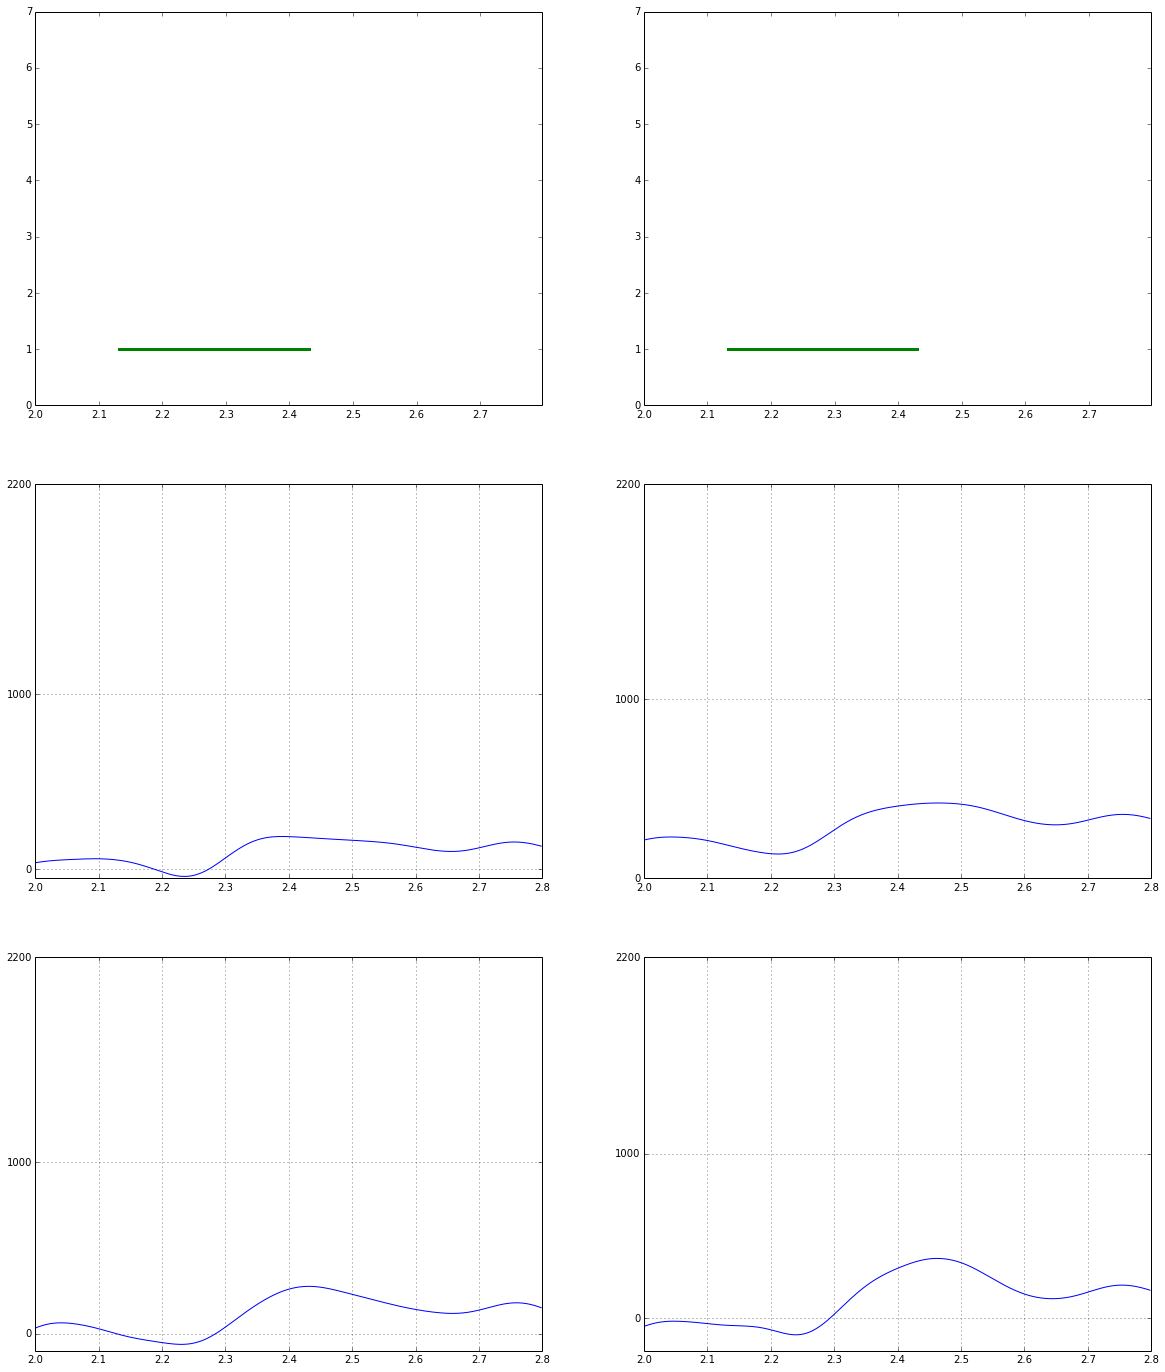

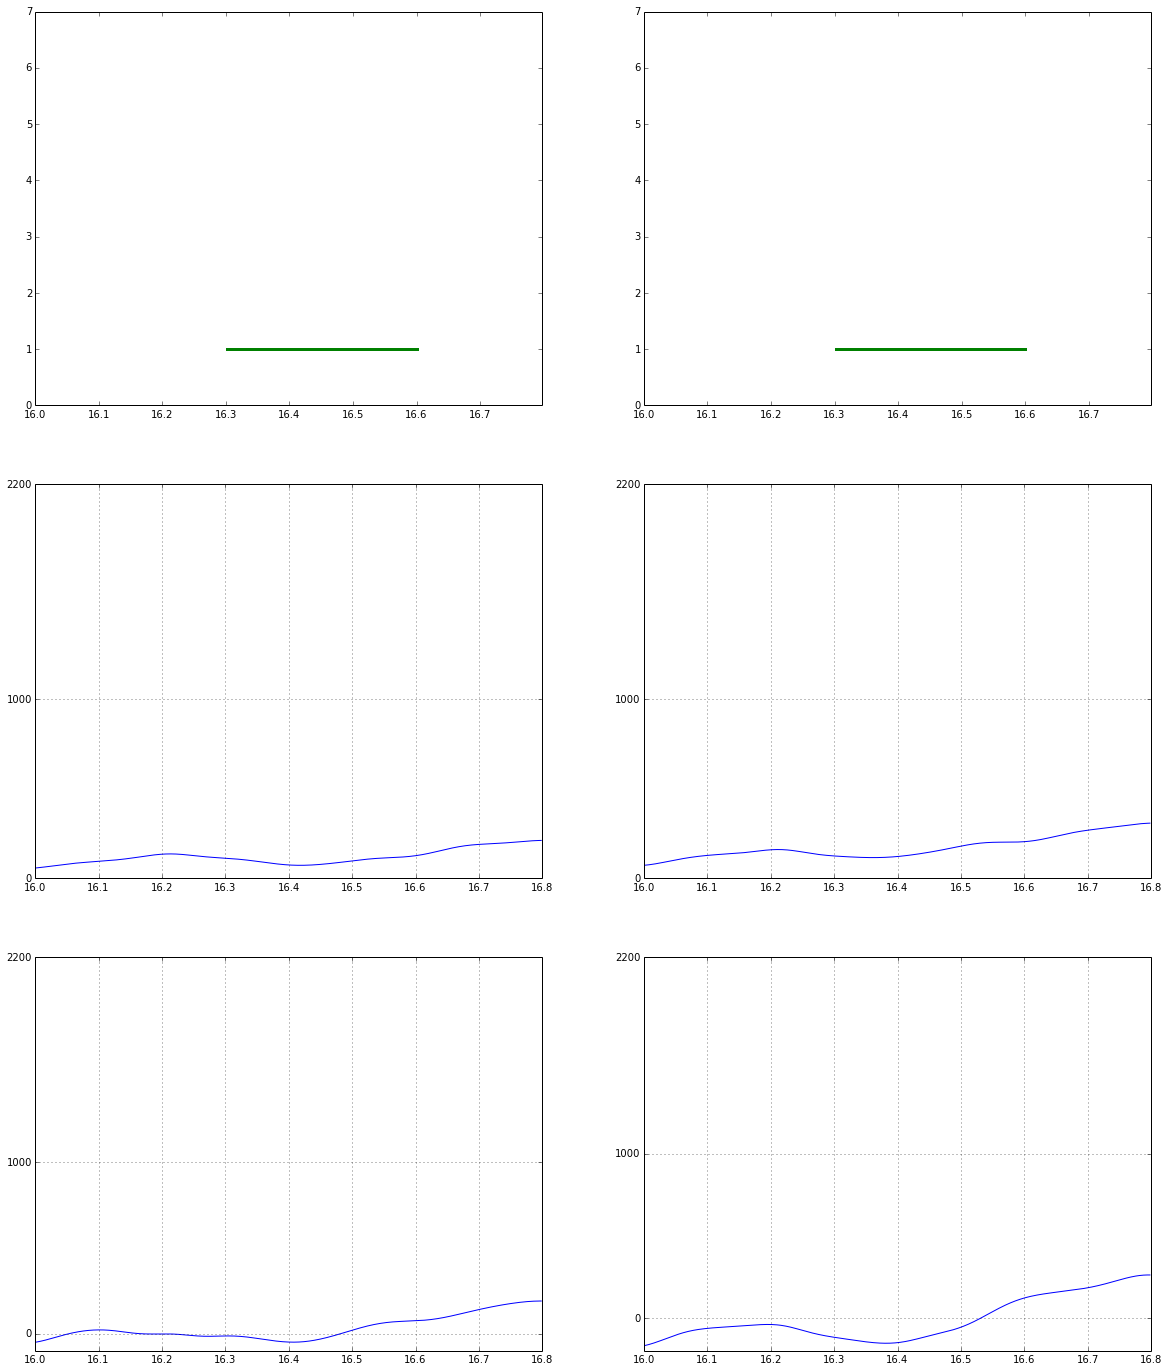

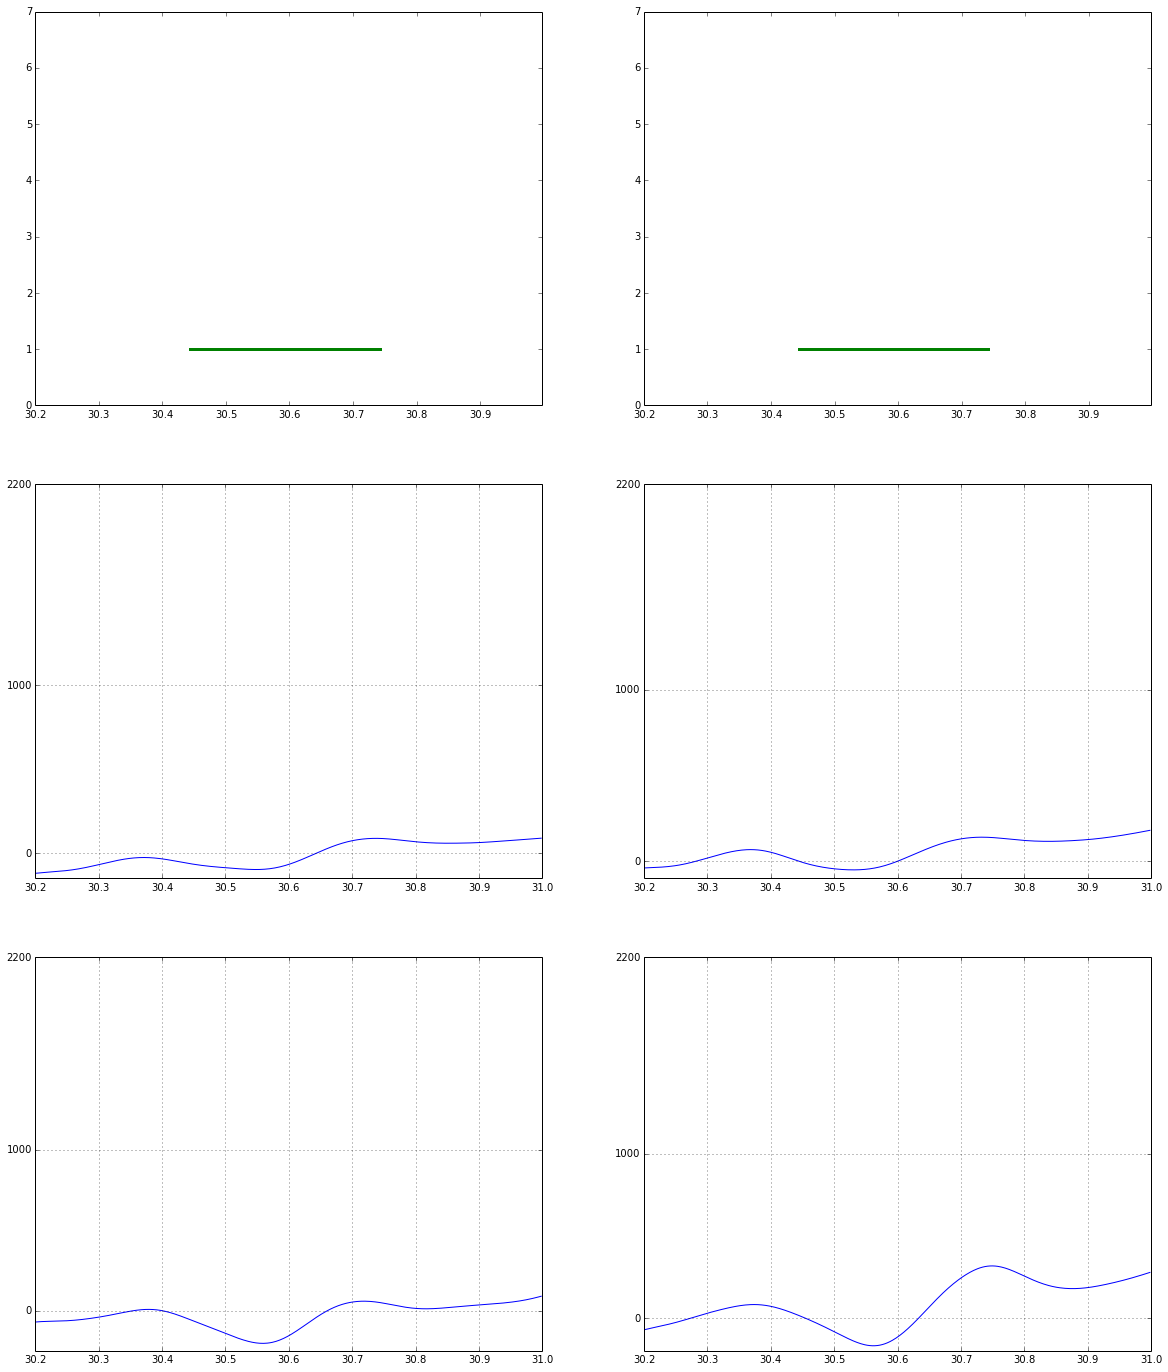

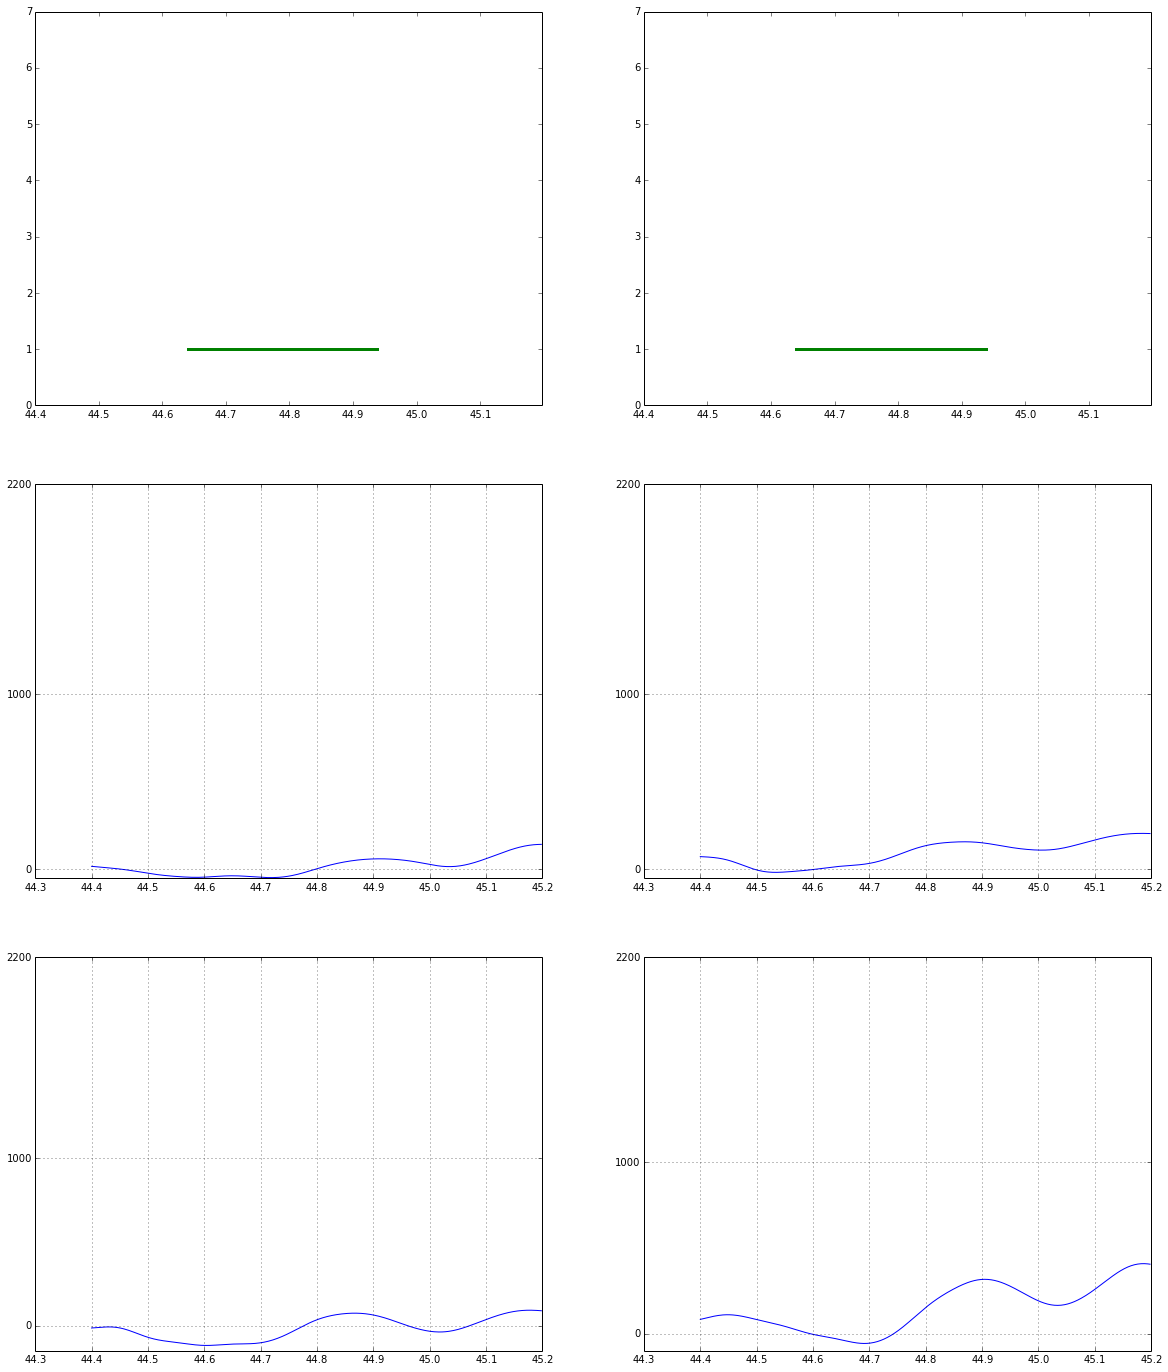

In [99]:

plotChans(s4s2f[1000:1400],s4s2['chans'][[18,19,20,29]])  
plotChans(s4s2f[8000:8400],s4s2['chans'][[18,19,20,29]]) 
plotChans(s4s2f[15100:15500],s4s2['chans'][[18,19,20,29]]) 
plotChans(s4s2f[22200:22600],s4s2['chans'][[18,19,20,29]]) 

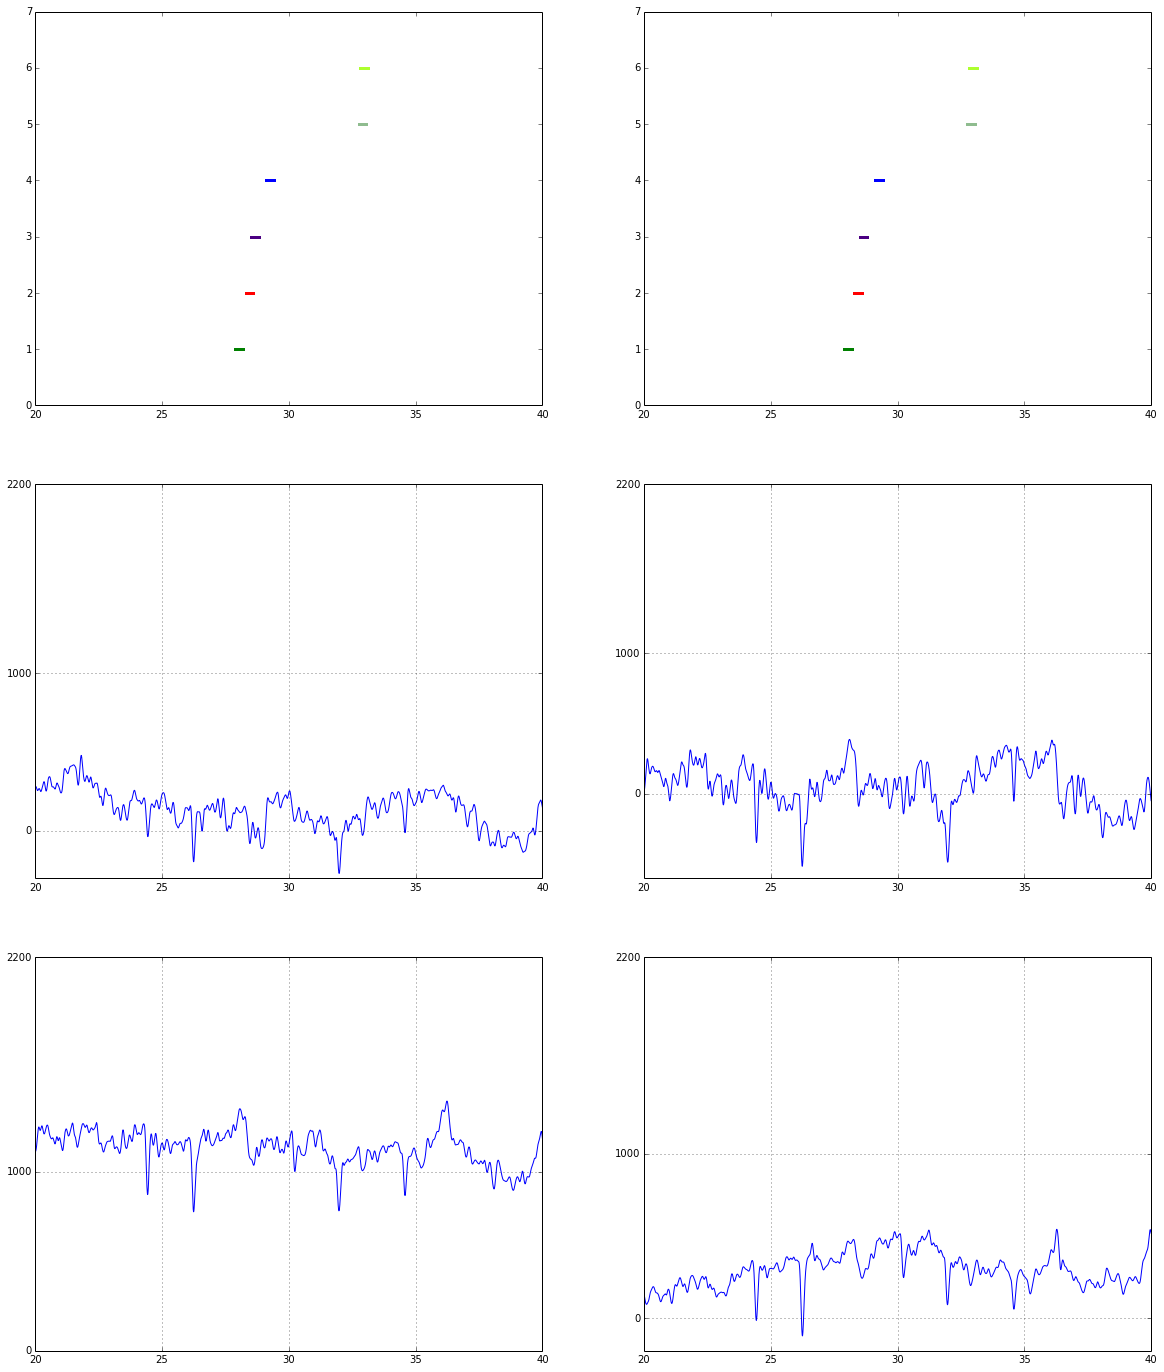

In [8]:

plotChans(s2s2f[10000:20000],s4s2['chans'][10:14])  

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


"\nfor chan in s4s2['chans']:\n    s4s2f[chan][8000:8600] = s4s2f[chan][8000:8600]-np.average(s4s2f[chan][8000:8600])\n    pl.plot(range(len(s4s2f[8000:8600])),s4s2f[chan][8000:8600],color='b')\n    pl.axvline(x=151,color='k')\npl.show()\nfor chan in s4s2['chans']:\n    s4s2f[chan][15100:15700] = s4s2f[chan][15100:15700]-np.average(s4s2f[chan][15100:15700])\n    pl.plot(range(len(s4s2f[15100:15700])),s4s2f[chan][15100:15700],color='b')\n    pl.axvline(x=122,color='k')\n"

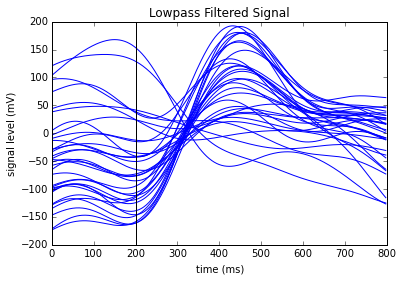

In [14]:
pl.clf()
for chan in s4s2['chans']:
    s4s2f[chan][950:1350] = s4s2f[chan][950:1350]-np.average(s4s2f[chan][900:1500])
    #s4s2f[chan][950:1350] = s4s2f[chan][950:1350]-s4s2f[chan][950]
    pl.plot(range(len(s4s2f[950:1350])),s4s2f[chan][950:1350],color='b')
    pl.axvline(x=100,color='k')

pl.ylabel('signal level (mV)')
pl.xticks(range(0,401,50),range(0,801,100))
pl.xlabel('time (ms)')
pl.title('Lowpass Filtered Signal')
pl.savefig('lfilt')
'''
for chan in s4s2['chans']:
    s4s2f[chan][8000:8600] = s4s2f[chan][8000:8600]-np.average(s4s2f[chan][8000:8600])
    pl.plot(range(len(s4s2f[8000:8600])),s4s2f[chan][8000:8600],color='b')
    pl.axvline(x=151,color='k')
pl.show()
for chan in s4s2['chans']:
    s4s2f[chan][15100:15700] = s4s2f[chan][15100:15700]-np.average(s4s2f[chan][15100:15700])
    pl.plot(range(len(s4s2f[15100:15700])),s4s2f[chan][15100:15700],color='b')
    pl.axvline(x=122,color='k')
'''


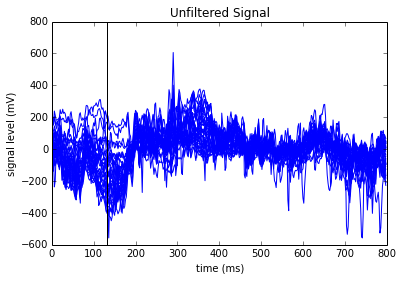

In [36]:
pl.clf()
for chan in s4s2['chans']:
    s4s2['fd'][chan][1000:1400] = s4s2['fd'][chan][1000:1400]-np.average(s4s2['fd'][chan][1000:1400])
    pl.plot(range(len(s4s2['fd'][1000:1400])),s4s2['fd'][chan][1000:1400],color='b')
    pl.axvline(x=66,color='k')

pl.ylabel('signal level (mV)')
pl.xticks(range(0,401,50),range(0,801,100))
pl.xlabel('time (ms)')
pl.title('Unfiltered Signal')
pl.savefig('ufilt')

In [38]:
s4s2f['HandStart'][15200:15250]

15200    0
15201    0
15202    0
15203    0
15204    0
15205    0
15206    0
15207    0
15208    0
15209    0
15210    0
15211    0
15212    0
15213    0
15214    0
15215    0
15216    0
15217    0
15218    0
15219    0
15220    0
15221    0
15222    1
15223    1
15224    1
15225    1
15226    1
15227    1
15228    1
15229    1
15230    1
15231    1
15232    1
15233    1
15234    1
15235    1
15236    1
15237    1
15238    1
15239    1
15240    1
15241    1
15242    1
15243    1
15244    1
15245    1
15246    1
15247    1
15248    1
15249    1
Name: HandStart, dtype: int64

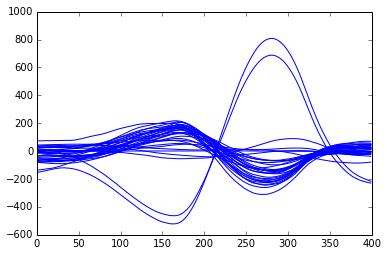

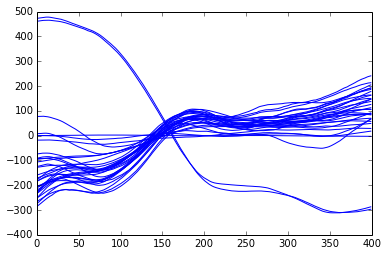

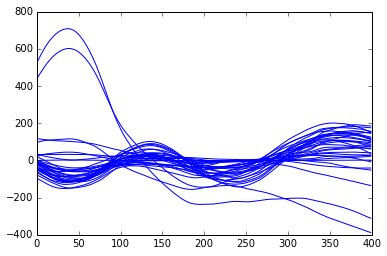

In [42]:
pl.clf()
for chan in s2s2['chans']:
    s2s2f[chan][1200:1600] = s2s2f[chan][1200:1600]-np.average(s2s2f[chan][1200:1600])
    pl.plot(range(len(s2s2f[1200:1600])),s2s2f[chan][1200:1600],color='b')
pl.show()
for chan in s2s2['chans']:
    s2s2f[chan][8000:8400] = s2s2f[chan][8000:8400]-np.average(s2s2f[chan][8000:8400])
    pl.plot(range(len(s2s2f[8000:8400])),s2s2f[chan][8000:8400],color='b')
pl.show()
for chan in s2s2['chans']:
    s2s2f[chan][15100:15500] = s2s2f[chan][15100:15500]-np.average(s2s2f[chan][15100:15500])
    pl.plot(range(len(s2s2f[15100:15500])),s2s2f[chan][15100:15500],color='b')

In [47]:
channels

Index(['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10'], dtype='object')

(129,) (129,)


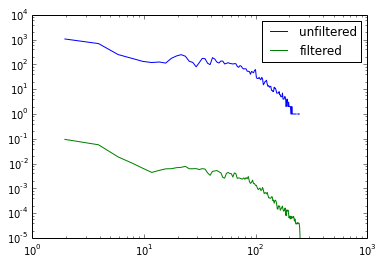

In [75]:
psd1 = welch(s1s1['Fp2'][:4000],fs=500)
psd2 = welch(s1s1f['Fp2'][:4000],fs=500)
pl.loglog(psd1[0],psd1[1],label="unfiltered")
pl.loglog(psd2[0],psd2[1],label="filtered")
pl.legend()
print(psd1[1].shape,psd2[1].shape)

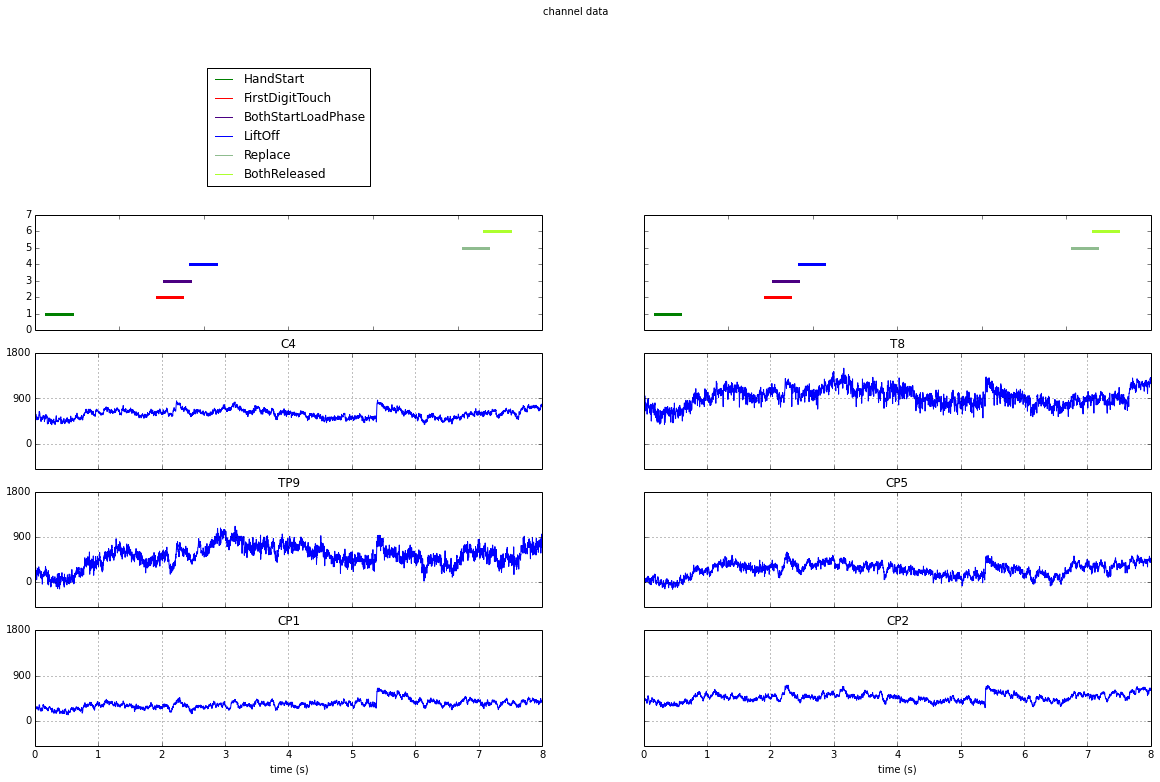

In [208]:


fig1, axes1 = pl.subplots(nrows = 5,ncols=2)
fig1.suptitle("channel data")
for i, ch in enumerate(channels[14:20]):
    sample_s1s1.plot(x="time",y=ch,ax=axes1[i//2 + 2][i%2],legend=False,figsize=(20,12))
    axes1[i//2 + 2][i%2].set_title(ch)
    axes1[i//2 + 2][i%2].set_xlabel("")
    axes1[i//2 + 2][i%2].set_yticks([0,900,1800])
    axes1[i//2 + 2][i%2].set_ylim([-500,1800])
    

lines = []
for i, ev in enumerate(events):
    times = sample_s1s1["time"][sample_s1s1[ev]==1]
    ys = np.full(len(times),i+1)
    for j in range(2):
        axes1[1][j].set_ylim(0,7) 
        axes1[1][j].plot(times,ys,color=event_colours[ev],linewidth=3,label=ev)
    axes1[0][0].plot([0],[0],color=event_colours[ev],label=ev)
    axes1[0][0].legend(loc = "lower center")

pl.setp([a.get_xticklabels() for a in axes1.flatten()[0:8]], visible=False)
pl.setp([a.get_yticklabels() for a in axes1[:, 1]], visible=False)    
    
for j in range(2):
    axes1[0][j].axis('off')
    axes1[0][j].set_xticks([])
    axes1[0][j].set_yticks([])
    axes1[4,j].set_xlabel("time (s)")
    
pl.savefig(image_path + "s1s1_6chan.png")

In [ ]:
fig2, axes2 = pl.subplots(nrows=len(channels)//2, ncols=2)
fig2.suptitle(event)
for i, ch in enumerate(channels):
    sample_s1s1.plot(kind="scatter", x="time", y=ch, edgecolors='none', ax=axes2[i//2][i%2], figsize=(20,20), c=sample_s1s1[event].apply(EventColors.__getitem__))
    axes[i//2][i%2].set_xlabel("")
    axes[i//2][i%2].set_yticks([0,1000,2000,3000])